In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [33]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import log_loss

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import KFold

# Constant
random_state = 42

plt.style.use('ggplot')

In [34]:
df_train = pd.read_csv(f'C:\\Users\\Administrator\\Desktop\\Projects\\Python\\Kaggle\\Football Match Probability Prediction\\train.csv')
df_test = pd.read_csv(f'C:\\Users\\Administrator\\Desktop\\Projects\\Python\\Kaggle\\Football Match Probability Prediction\\test.csv')
submission = pd.read_csv(f'C:\\Users\\Administrator\\Desktop\\Projects\\Python\\Kaggle\\Football Match Probability Prediction\\sample_submission.csv')

In [35]:
df_train

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,draw,Zamora Fútbol Club,Hermanos Colmenares,2021-04-30 23:00:00,Primera Division,800,False,7708122.0,37564088.0,...,800.0,800.0,1101.0,1101.0,803.0,803.0,803.0,803.0,803.0,803.0
110934,18030096,away,Royal Pari,Oriente Petrolero,2021-04-30 23:00:00,Liga De Futbol Prof,1098,False,465833.0,16488543.0,...,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0
110935,17715497,draw,São Bernardo,Água Santa,2021-04-30 23:00:00,Paulista A2,1314,False,8416491.0,528562.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
110936,17944153,away,Everton,La Serena,2021-05-01 00:00:00,Primera Division,663,False,6973085.0,471757.0,...,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0


### Columns Name

In [36]:
cols_names = [_ for _ in df_train.columns if "goal" in _]

### Nan Values 

In [37]:
df_nan = pd.merge(
    pd.DataFrame(df_train[cols_names].isna().sum(),columns = ['train_cnt']),
    pd.DataFrame(df_test[cols_names].isna().sum(), columns = ['test_cnt']),
    left_index = True,
    right_index = True
)

df_nan['train_pct'] = round(df_nan['train_cnt']*100 / len(df_train),2)
df_nan['test_pct'] = round(df_nan['test_cnt']*100 / len(df_test),2)

df_nan

,train_cnt,test_cnt,train_pct,test_pct
home_team_history_goal_1,1159,498,1.04,0.68
home_team_history_goal_2,2451,1082,2.21,1.49
home_team_history_goal_3,3773,1678,3.40,2.31
home_team_history_goal_4,5101,2263,4.60,3.11
home_team_history_goal_5,6477,2852,5.84,3.92
home_team_history_goal_6,7896,3437,7.12,4.73
home_team_history_goal_7,9295,4085,8.38,5.62
home_team_history_goal_8,10719,4766,9.66,6.55
home_team_history_goal_9,12136,5402,10.94,7.43
home_team_history_goal_10,13559,6064,12.22,8.34


In [41]:
pd.DataFrame(df_train[cols_names].max(), columns = ['max'])

,max
home_team_history_goal_1,18.0
home_team_history_goal_2,18.0
home_team_history_goal_3,18.0
home_team_history_goal_4,21.0
home_team_history_goal_5,18.0
home_team_history_goal_6,21.0
home_team_history_goal_7,15.0
home_team_history_goal_8,18.0
home_team_history_goal_9,21.0
home_team_history_goal_10,18.0


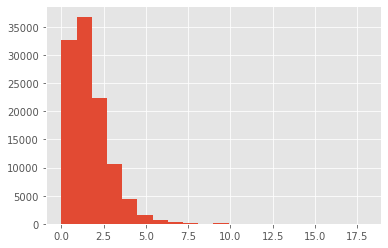

In [46]:
df_train.home_team_history_goal_1.hist(bins=20);